In [2]:
from wassnmf.wassnmf import *
import pandas as pd
import numpy as np

                    timestamp          scenario  n_features  n_samples  \
0  2025-01-21T11:45:17.777554  gaussian_mixture         100        100   
1  2025-01-21T11:45:38.456970  gaussian_mixture         100        100   
2  2025-01-21T11:46:08.253605  gaussian_mixture         100        100   
3  2025-01-21T11:46:56.195208  gaussian_mixture         100        100   
4  2025-01-21T11:47:05.791931  gaussian_mixture         100        100   

   n_components  epsilon  rho1  rho2  n_iter  wass_error  std_error  \
0             2     0.01  0.01  0.01      10    0.000230   0.000188   
1             2     0.01  0.01  0.01      20    0.000229   0.000188   
2             2     0.01  0.01  0.01      30    0.000230   0.000188   
3             2     0.01  0.01  0.01      50    0.000230   0.000188   
4             2     0.01  0.01  0.05      10    0.000230   0.000188   

   wass_time  std_time  
0  23.613179  0.003768  
1  20.481334  0.003636  
2  29.642822  0.003484  
3  47.795085  0.003340  
4  

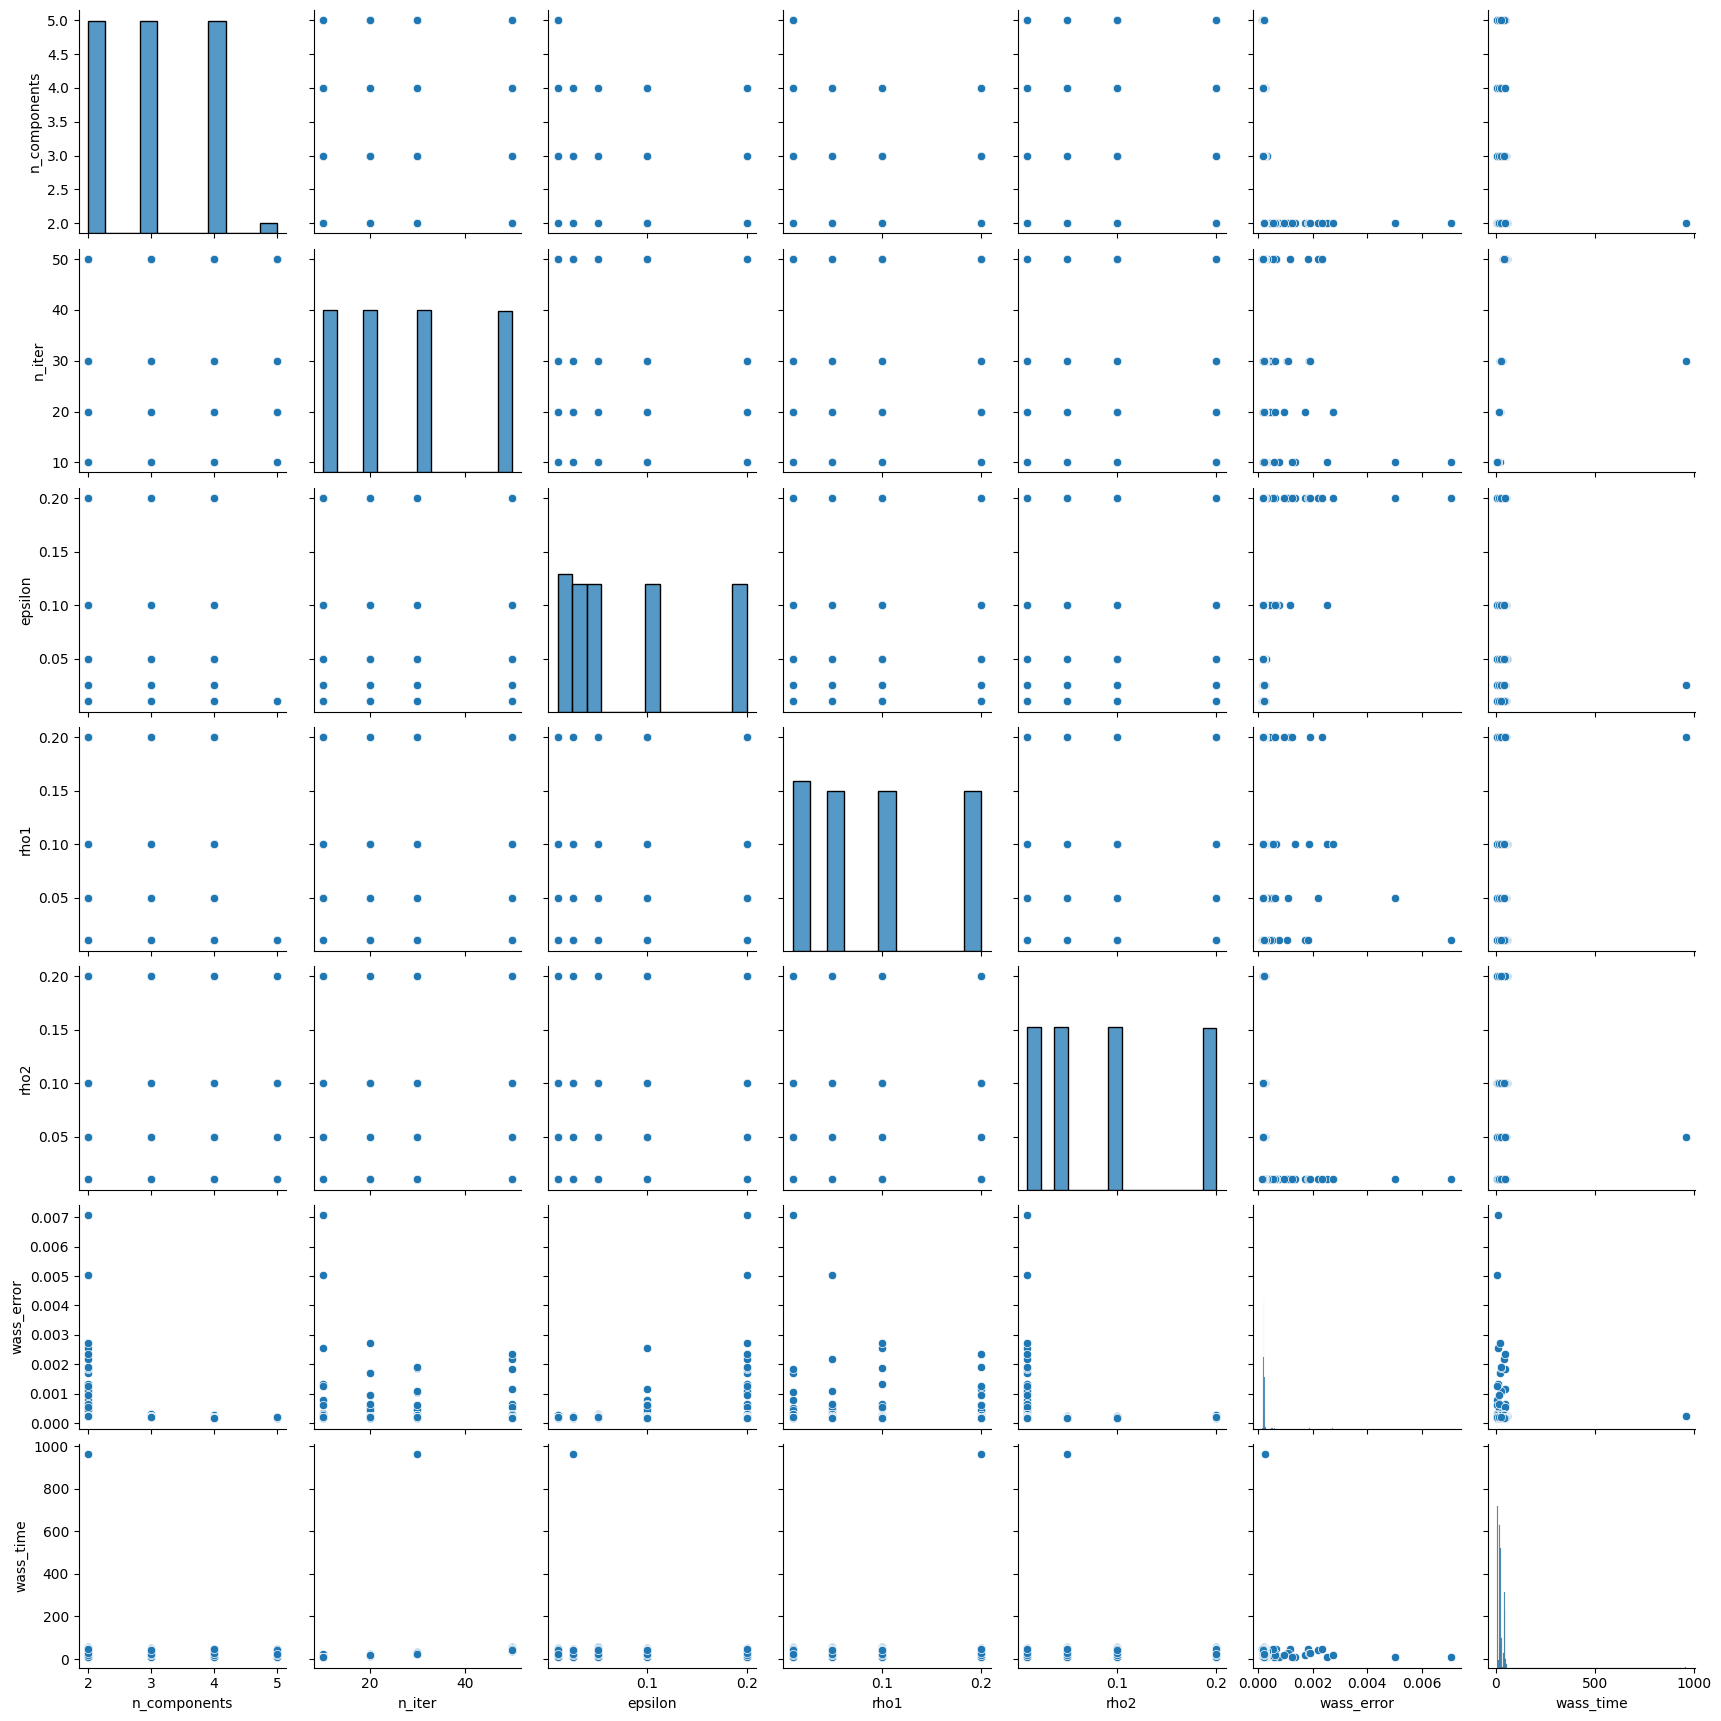

### Regression Model: Predicting Wasserstein Error ###
                            OLS Regression Results                            
Dep. Variable:             wass_error   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     16.88
Date:                Երկ, 10 Փտր 2025   Prob (F-statistic):           5.06e-16
Time:                        01:11:20   Log-Likelihood:                 6467.3
No. Observations:                 975   AIC:                        -1.292e+04
Df Residuals:                     969   BIC:                        -1.289e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

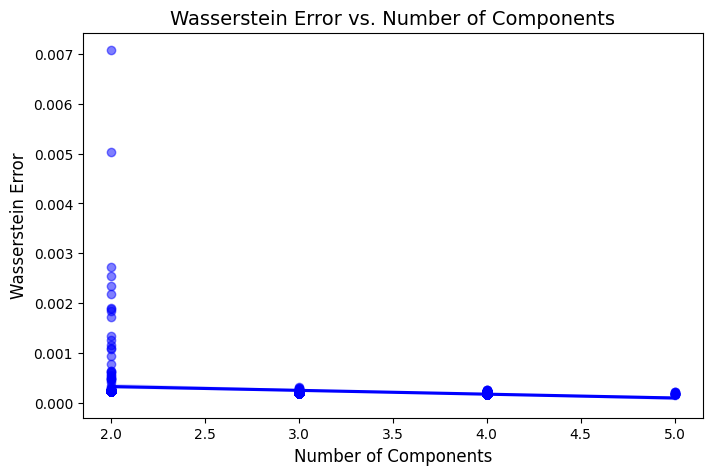

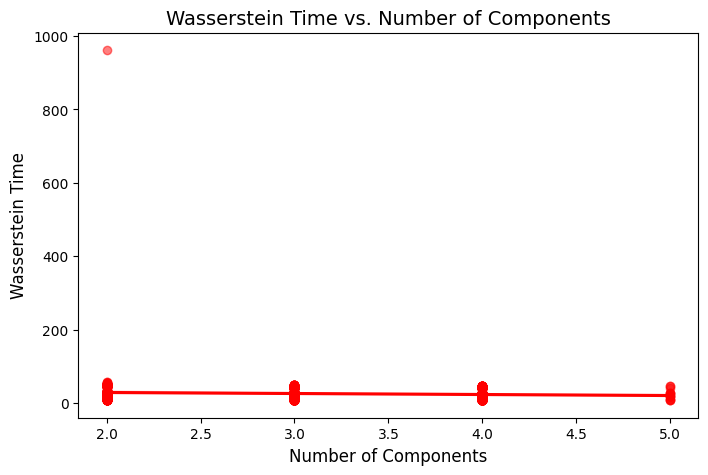

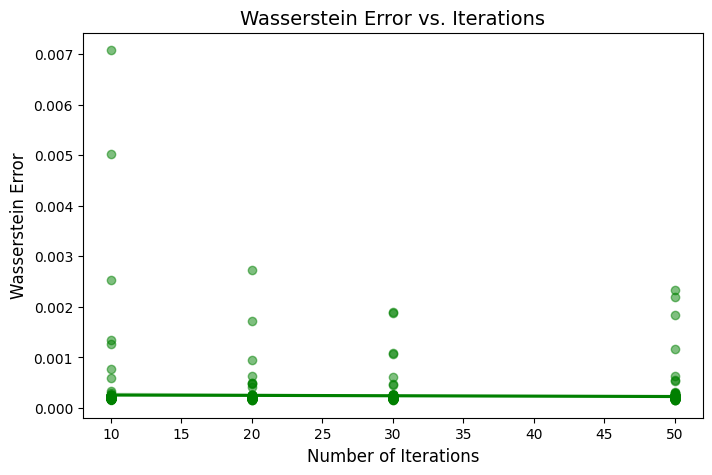

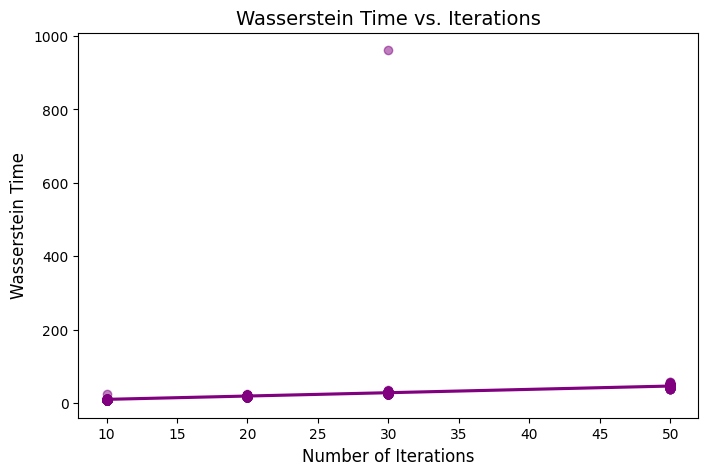

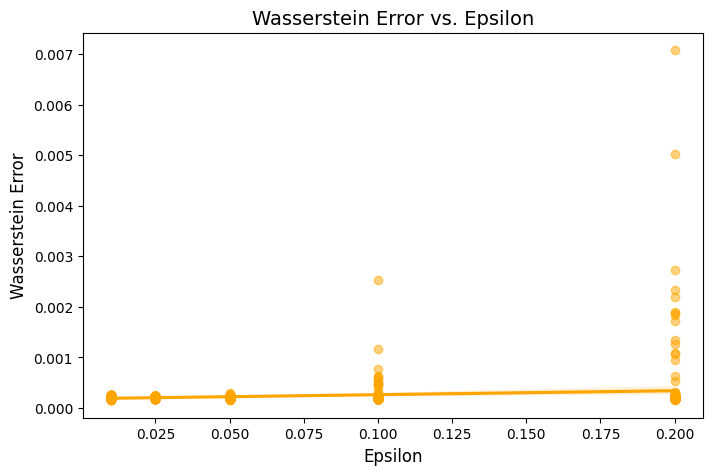

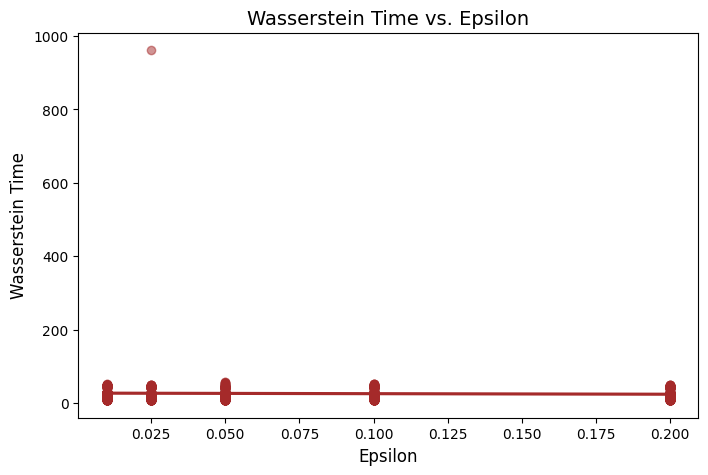

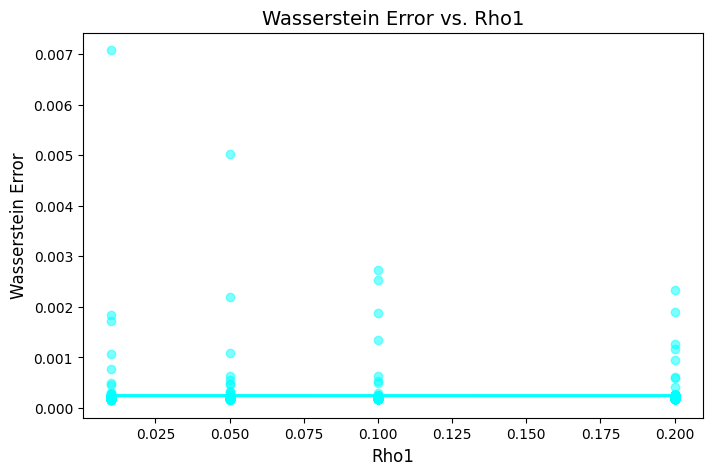

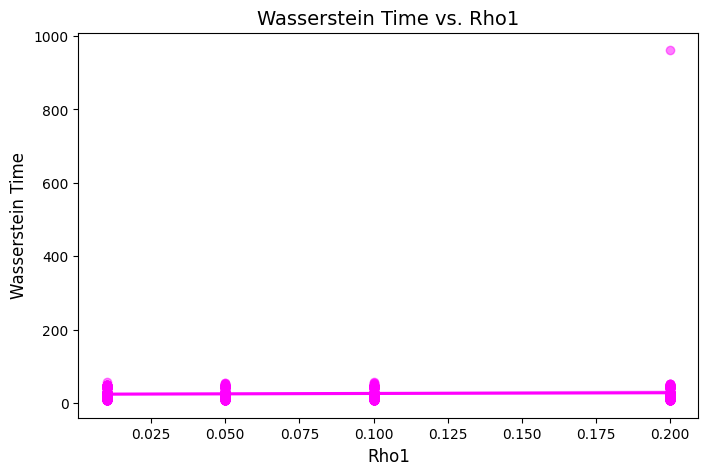

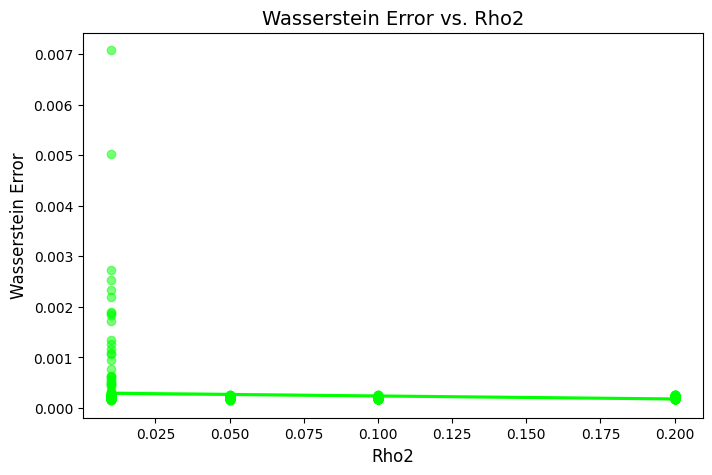

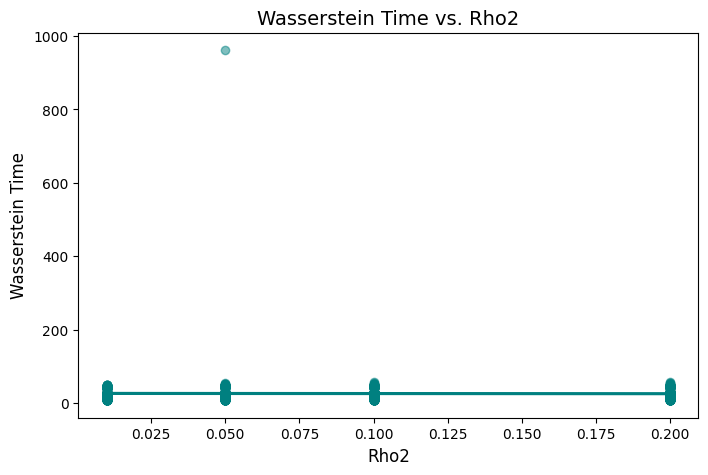

In [4]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "../../wassnmf_experiments/results_1.csv"  # Change this if needed
df = pd.read_csv(file_path)

# Display the first few rows to check structure
print(df.head())

# Summary statistics
print(df.describe())

# Exploratory data analysis (optional: visualize distributions)
sns.pairplot(df[['n_components', 'n_iter', 'epsilon', 'rho1', 'rho2', 'wass_error', 'wass_time']])
plt.show()

# Prepare the data for regression analysis
X = df[['n_components', 'n_iter', 'epsilon', 'rho1', 'rho2']]  # Independent variables
X = sm.add_constant(X)  # Add constant term for intercept

# Dependent variables
y_error = df['wass_error']  # Predicting Wasserstein Error
y_time = df['wass_time']  # Predicting Computation Time

# Fit regression models
model_error = sm.OLS(y_error, X).fit()
model_time = sm.OLS(y_time, X).fit()

# Display regression results
print("### Regression Model: Predicting Wasserstein Error ###")
print(model_error.summary())

print("\n### Regression Model: Predicting Computation Time ###")
print(model_time.summary())

# Visualizing Regression Relationships
def scatterplot_with_trend(x, y, data, xlabel, ylabel, title, color):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=x, y=y, data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": color}, color=color)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

# Generate scatter plots with trend lines
scatterplot_with_trend('n_components', 'wass_error', df, 'Number of Components', 'Wasserstein Error', 'Wasserstein Error vs. Number of Components', 'blue')
scatterplot_with_trend('n_components', 'wass_time', df, 'Number of Components', 'Wasserstein Time', 'Wasserstein Time vs. Number of Components', 'red')
scatterplot_with_trend('n_iter', 'wass_error', df, 'Number of Iterations', 'Wasserstein Error', 'Wasserstein Error vs. Iterations', 'green')
scatterplot_with_trend('n_iter', 'wass_time', df, 'Number of Iterations', 'Wasserstein Time', 'Wasserstein Time vs. Iterations', 'purple')
scatterplot_with_trend('epsilon', 'wass_error', df, 'Epsilon', 'Wasserstein Error', 'Wasserstein Error vs. Epsilon', 'orange')
scatterplot_with_trend('epsilon', 'wass_time', df, 'Epsilon', 'Wasserstein Time', 'Wasserstein Time vs. Epsilon', 'brown')
scatterplot_with_trend('rho1', 'wass_error', df, 'Rho1', 'Wasserstein Error', 'Wasserstein Error vs. Rho1', 'cyan')
scatterplot_with_trend('rho1', 'wass_time', df, 'Rho1', 'Wasserstein Time', 'Wasserstein Time vs. Rho1', 'magenta')
scatterplot_with_trend('rho2', 'wass_error', df, 'Rho2', 'Wasserstein Error', 'Wasserstein Error vs. Rho2', 'lime')
scatterplot_with_trend('rho2', 'wass_time', df, 'Rho2', 'Wasserstein Time', 'Wasserstein Time vs. Rho2', 'teal')

